## Lesson 5 - Deep Dive into the Enron Dataset

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
from time import time
sys.path.append("../tools/")
sys.path.append("../naive bayes/")
sys.path.append("../datasets_questions/")
sys.path.append("../final_project/")

import explore_enron_data as eD
from feature_format import featureFormat, targetFeatureSplit


### What is a Person Of Interest? (POI)
- Indicted
- Testified for immunity
- Settled without admitting guilt

In [3]:
import matplotlib as pl


#### How many data points (people) are in the dataset?

In [4]:
_ = eD.enron_data

In [5]:
print "There are %d many people in the dataset." % len(eD.enron_data.keys())

There are 146 many people in the dataset.


#### For each person, how many features are available?


In [6]:
print len(eD.enron_data['METTS MARK'].keys())
eD.enron_data['METTS MARK'].keys()

21


['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

#### The “poi” feature records whether the person is a person of interest, according to our definition. 
How many POIs are there in the E+F dataset?

In [7]:
eD.enron_data['METTS MARK']['poi']

poiCount = 0
for person in eD.enron_data:
    if eD.enron_data[person]['poi']:
        poiCount += 1
        print person
    
print "There are %d POIs in the dataset" % poiCount

HANNON KEVIN P
COLWELL WESLEY
RIEKER PAULA H
KOPPER MICHAEL J
SHELBY REX
DELAINEY DAVID W
LAY KENNETH L
BOWEN JR RAYMOND M
BELDEN TIMOTHY N
FASTOW ANDREW S
CALGER CHRISTOPHER F
RICE KENNETH D
SKILLING JEFFREY K
YEAGER F SCOTT
HIRKO JOSEPH
KOENIG MARK E
CAUSEY RICHARD A
GLISAN JR BEN F
There are 18 POIs in the dataset


#### How many POI’s were there total?

We compiled a list of all POI names (in ../final_project/poi_names.txt) and associated email addresses (in ../final_project/poi_email_addresses.py).

How many POI’s were there total? (Use the names file, not the email addresses, since many folks have more than one address and a few didn’t work for Enron, so we don’t have their emails.)



In [8]:
import re
poiCount = 0

f = open('../final_project/poi_names.txt', 'r')
try:
    for line in f:
        m = re.search('^\(y\)', line )
        if m:
            print line
            poiCount += 1
            
finally:
    f.close()
    
print "There are %d POIs in the dataset" % poiCount

(y) Lay, Kenneth

(y) Skilling, Jeffrey

(y) Forney, John

(y) Delainey, David

There are 4 POIs in the dataset


#### What is the total value of the stock belonging to James Prentice?

In [9]:
eD.enron_data['PRENTICE JAMES']['total_stock_value']

1095040

#### How many email messages do we have from Wesley Colwell to persons of interest?

In [10]:
eD.enron_data['COLWELL WESLEY']['from_this_person_to_poi']

11

In [11]:
eD.enron_data['SKILLING JEFFREY K']['exercised_stock_options']

19250000

#### Of these three individuals (Lay, Skilling and Fastow), who took home the most money (largest value of “total_payments” feature)?

How much money did that person get?

In [12]:
print eD.enron_data['SKILLING JEFFREY K']['total_payments']
print eD.enron_data['LAY KENNETH L']['total_payments']
print eD.enron_data['FASTOW ANDREW S']['total_payments']

8682716
103559793
2424083


In [13]:
pCount = 0
for person in eD.enron_data:
    if eD.enron_data[person]['salary'] != "NaN":
        pCount += 1
        #print person, eD.enron_data[person]['salary']
    
print "There are %d persons in the dataset with a quantified salary" % pCount

There are 95 persons in the dataset with a quantified salary


In [14]:
pCount = 0
for person in eD.enron_data:
    if eD.enron_data[person]['email_address'] != "NaN":
        pCount += 1
        #print person, eD.enron_data[person]['email_address']
    
print "There are %d persons in the dataset with a known email address" % pCount

There are 111 persons in the dataset with a known email address


#### How many people in the E+F dataset (as it currently exists) have “NaN” for their total payments? What percentage of people in the dataset as a whole is this?

In [15]:
pCount = 0
for person in eD.enron_data:
    if eD.enron_data[person]['total_payments'] == "NaN":
        pCount += 1
        print person, eD.enron_data[person]['total_payments']
    
print "There are %d persons in have “NaN” for their total payments" % pCount

CORDES WILLIAM R NaN
LOWRY CHARLES P NaN
CHAN RONNIE NaN
WHALEY DAVID A NaN
CLINE KENNETH W NaN
LEWIS RICHARD NaN
MCCARTY DANNY J NaN
POWERS WILLIAM NaN
PIRO JIM NaN
WROBEL BRUCE NaN
MCDONALD REBECCA NaN
SCRIMSHAW MATTHEW NaN
GATHMANN WILLIAM D NaN
GILLIS JOHN NaN
MORAN MICHAEL P NaN
LOCKHART EUGENE E NaN
SHERRICK JEFFREY B NaN
FOWLER PEGGY NaN
CHRISTODOULOU DIOMEDES NaN
HUGHES JAMES A NaN
HAYSLETT RODERICK J NaN
There are 21 persons in have “NaN” for their total payments


In [16]:
import pandas as pd
import random
import csv

csvfile = 'adult.data'
df = pd.read_csv(csvfile, header=None,skipinitialspace = True)
columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss',
           'hours_per_week','native_country','salary'] 
df.columns = columns

In [17]:
# generate data for regression with line equation
# y = (6.25)x + 0

def makeSalary():
    m = 6.25
    return (m + random.random()) * df['age']

    
X = df['age']
y = df['salary'].replace(['<=50K','>50K'],[makeSalary(),makeSalary()])



In [18]:
from sklearn import cross_validation

ages_train, ages_test, net_worths_train, net_worths_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [19]:
ages_test = ages_test.reshape(-1, 1)
net_worths_test = net_worths_test.reshape(-1, 1)
ages_train =  ages_train.reshape(-1, 1)
net_worths_train = net_worths_train.reshape(-1, 1)

Omoju's net worth prediction $229.77k
slope of regression is 6.35
intercepts of regression is 1.25


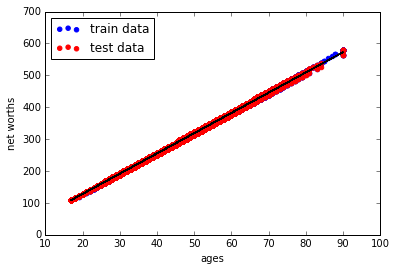

In [20]:
import numpy
import matplotlib

import matplotlib.pyplot as plt
from class_vis import prettyPicture, output_image

%matplotlib inline

 

def studentReg(ages_train, net_worths_train):
    from sklearn import linear_model
    reg = linear_model.LinearRegression()
    
    # Reshape data using X.reshape(-1, 1) since data has a single feature or X.
    return reg.fit(ages_train.reshape(-1, 1), net_worths_train.reshape(-1, 1))


reg = studentReg(ages_train, net_worths_train)
print "Omoju's net worth prediction $%.2fk" % reg.predict([[36]])
print "slope of regression is %.2f" % reg.coef_
print "intercepts of regression is %.2f" % reg.intercept_


plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()
    

In [21]:
print "\n ********stats on dataset********\n"
print "r-squared score on testing data: ", reg.score(ages_test, net_worths_test)
print "r-squared score on training data: ", reg.score(ages_train, net_worths_train)


 ********stats on dataset********

r-squared score on testing data:  0.998532888784
r-squared score on training data:  0.998553902441



 ********Regression on salary to predict bonus ********



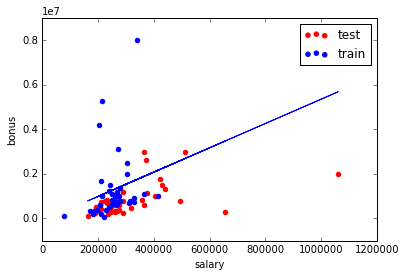

slope of regression is 5.45
intercepts of regression is -102360.54

 ********stats on dataset********

r-squared score on testing data:  -1.48499241737
r-squared score on training data:  0.0455091926995


In [22]:
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature

print "\n ********Regression on salary to predict bonus ********\n"

features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                            target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass


plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print "slope of regression is %.2f" % reg.coef_
print "intercepts of regression is %.2f" % reg.intercept_

print "\n ********stats on dataset********\n"
print "r-squared score on testing data: ", reg.score(feature_test, target_test)
print "r-squared score on training data: ", reg.score(feature_train, target_train)



An r-squared score of -1.48499241737 is pretty bad. 

There are lots of finance features available, some of which might be more powerful than others in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit and guess that the ```long_term_incentive``` feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a person’s bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. **Perform the regression of bonus against long term incentive--what’s the score on the test data?**




 ********Regression on long_term_incentive to predict bonus ********



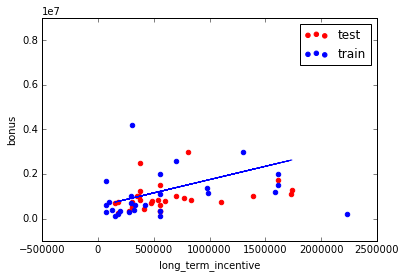

slope of regression is 1.19
intercepts of regression is 554478.76

 ********stats on dataset********

r-squared score on testing data:  -0.59271289995
r-squared score on training data:  0.217085971258


In [23]:
print "\n ********Regression on long_term_incentive to predict bonus ********\n"


features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)



### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print "slope of regression is %.2f" % reg.coef_
print "intercepts of regression is %.2f" % reg.intercept_

print "\n ********stats on dataset********\n"
print "r-squared score on testing data: ", reg.score(feature_test, target_test)
print "r-squared score on training data: ", reg.score(feature_train, target_train)

**Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like.** You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and we’ll spend lots of time on them in the next lesson.

A point like this can have a big effect on a regression: if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be as things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom right before ```plt.xlabel(features_list[1]):```

```python
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")
```

Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. **What’s the slope of the new regression line?**

(That’s a big difference, and it’s mostly driven by the outliers.)


 ********Regression on salary to predict exercised_stock_options, cleaned for Outliers ********



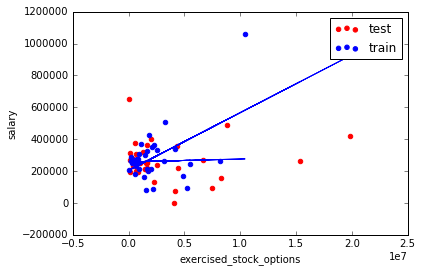

slope of regression is 0.00
intercepts of regression is 257889.52

 ********stats on dataset********

r-squared score on testing data:  0.00436584208953
r-squared score on training data:  0.00605083898368


In [24]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature

print "\n ********Regression on salary to predict exercised_stock_options, cleaned for Outliers ********\n"

features_list = ["salary", "exercised_stock_options"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print "slope of regression is %.2f" % reg.coef_
print "intercepts of regression is %.2f" % reg.intercept_

print "\n ********stats on dataset********\n"
print "r-squared score on testing data: ", reg.score(feature_test, target_test)
print "r-squared score on training data: ", reg.score(feature_train, target_train)
